# Homework 4 - CSCI 7000
## Behzod Mirpochoev

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Problem 1, data -> weekly incidence, new infections
that is not I(t), ~2 week duration

10% ascertainment, the proportion of actual cases that we can pick up
measuring 1/10 cases, actual cases are 10x what they should be

### Problem 3

In [2]:
pos_df = pd.read_csv("HW4_Q3_pos.csv")
neg_df = pd.read_csv("HW4_Q3_neg.csv")
data_df = pd.read_csv("HW4_Q3_data.csv")

neg_df.columns = ['values'] 
pos_df.columns = ['values']
data_df.columns = ['values'] 

neg_df['group'] = 'Negative Controls' 
pos_df['group'] = 'Positive Controls' 
data_df['group'] = 'Prevalence Study' 

all_data = pd.concat([neg_df, pos_df, data_df])

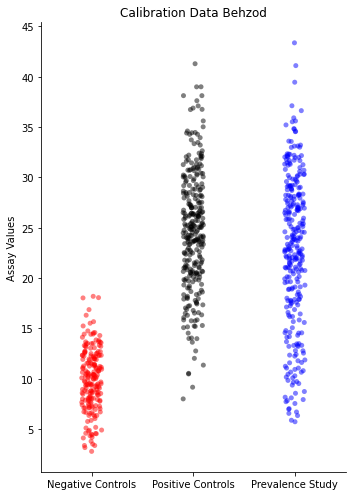

In [3]:
plt.figure(figsize=(5, 7))
palette_colors = {'Negative Controls': 'red', 'Positive Controls': 'black', 'Prevalence Study': 'blue'}

sns.stripplot(x='group', y='values', data = all_data, hue='group', palette=palette_colors, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('')
plt.ylabel('Assay Values')
plt.legend().set_visible(False)
plt.title('Calibration Data Behzod')

plt.tight_layout()
plt.savefig('3a.jpg', dpi = 300)

In [4]:
def se(pos, c):
    return np.mean(pos > c)

def sp(neg, c):
    return np.mean(neg < c)

def phi_hat(empirical, c):
    return np.mean(empirical > c)

def theta_hat(pos, neg, empirical, se, sp, phi_hat, c):
    if se(pos, c) + sp(neg, c) == 1:
        return np.nan
    numer = phi_hat(empirical, c) - (1 - sp(neg, c))
    denom = se(pos, c) + sp(neg, c) - 1
    return numer / denom

In [5]:
pos = pos_df['values']
neg = neg_df['values']
field = data_df['values']

c_low = min(pos)
c_high = max(neg)

calibr = np.sort(pd.concat([neg_df, pos_df])['values'])
c_range = calibr[(calibr >= c_low) & (calibr <= c_high)]

J_opt, c_opt = max((se(pos, c) + sp(neg, c) - 1, c) for c in c_range)
print(f'Youden optimum = {J_opt}, c = {c_opt}')

Youden optimum = 0.9163207341053092, c = 15.082487812966695


Youden choice - TPR: 0.9565217391304348, FPR: 0.04020100502512558 (sp: 0.9597989949748744)


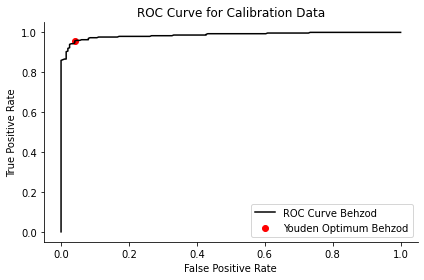

In [6]:
tpr = []
fpr = []
for c in calibr:
    tpr.append(se(pos, c))
    fpr.append(1 - sp(neg, c))

plt.plot(fpr, tpr, color='black', label='ROC Curve Behzod')
plt.scatter(1 - sp(neg, c_opt), se(pos, c_opt), color='red', label='Youden Optimum Behzod')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Calibration Data')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

print(f'Youden choice - TPR: {se(pos, c_opt)}, FPR: {1 - sp(neg, c_opt)} (sp: {sp(neg, c_opt)})')

plt.tight_layout()
plt.savefig('3c_1.jpg', dpi = 300)

Youden choice - corrected prevalence = 0.8357543743809839, c = 15.082487812966695


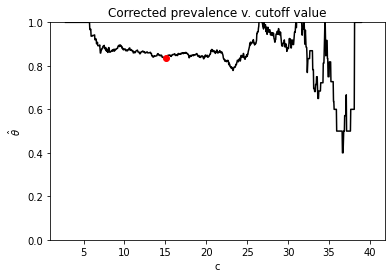

In [7]:
c_range = np.linspace(1,40, int(1e3))
theta_vals = [theta_hat(pos, neg, field, se, sp, phi_hat, c) for c in c_range]
theta_opt = theta_hat(pos, neg, field, se, sp, phi_hat, c_opt)

plt.plot(c_range, theta_vals, color = 'black', zorder = 0)
plt.scatter(c_opt, theta_opt, color = 'red', zorder = 1)
plt.xlabel('c')
plt.ylabel(r'$\hat{\theta}$')
plt.title('Corrected prevalence v. cutoff value')
plt.ylim(0,1)

print(f'Youden choice - corrected prevalence = {theta_opt}, c = {c_opt}')

plt.savefig('3c_2.jpg', dpi = 300)